<a href="https://colab.research.google.com/github/Keishin315/Keishin315/blob/main/signate_PM2.5forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> # **signateのpcゲームの勝敗予測コンペにおいて、、RandomForestRegresserを用いて分析を行なった。**








# **signate CLI をインストールをインストール** 
トークンを取得して、コンペデータをダウンロード

In [ ]:
pip install signate

In [ ]:
!signate token --email=jingxindi97@gmail.com --password=


The API Token has been downloaded successfully.


In [ ]:
!signate list

  competitionId  title                                                                                      closing     prize                  submitters
---------------  -----------------------------------------------------------------------------------------  ----------  -------------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                                       -                                        5415
             24  【練習問題】お弁当の需要予測                                                               -                                        6693
             27  【練習問題】Jリーグの観客動員数予測                                                        -                                        1557
            100  【練習問題】手書き文字認識                                                                 -           Knowledge                     204
            102  【練習問題】タイタニックの生存予測                                                         -           Knowledge                    1275
 

In [ ]:
!signate download --competition-id=575

sample_submit.csv

test.csv

train.csv


Download completed.


# ライブラリをインポート

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# ファイルをダウンロードし、加工していく

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
sample_sub = pd.read_csv('sample_submit.csv')

In [ ]:
train = train.drop('gameId',axis=1)

In [ ]:
train_x = train.drop('blueWins',axis=1)
train_y = train['blueWins']

In [ ]:
print(train_x,train_y)

      blueFirstBlood  blueKills  ...  blueTotalGold  blueTotalExperience
0                  0          7  ...          17398                17446
1                  1          8  ...          15925                14253
2                  1         14  ...          21457                19003
3                  1          6  ...          16364                17958
4                  1          3  ...          15451                16088
...              ...        ...  ...            ...                  ...
4920               1          8  ...          17489                17422
4921               1          7  ...          17296                16136
4922               0          7  ...          17287                17029
4923               0          2  ...          15283                16210
4924               1         11  ...          18722                18699

[4925 rows x 8 columns] 0       0
1       1
2       1
3       1
4       0
       ..
4920    0
4921    0
4922    1
4923    0

In [ ]:
#scaling
scaler0 = MinMaxScaler()
scaler0.fit(train_x)
X_train = scaler0.transform(train_x)

In [ ]:
print(X_train,train_y)

[[0.         0.5        0.61538462 ... 1.         0.44094596 0.61974373]
 [1.         0.57142857 0.69230769 ... 0.         0.23841606 0.04349395]
 [1.         1.         0.38461538 ... 0.         0.99903754 0.90073994]
 ...
 [0.         0.5        0.46153846 ... 0.         0.42568404 0.54448655]
 [0.         0.14285714 0.15384615 ... 0.         0.15014437 0.3966793 ]
 [1.         0.78571429 0.07692308 ... 1.         0.62298914 0.8458762 ]] 0       0
1       1
2       1
3       1
4       0
       ..
4920    0
4921    0
4922    1
4923    0
4924    1
Name: blueWins, Length: 4925, dtype: int64


# 訓練データと検証データに分割（７：３）

In [ ]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X_train,train_y,test_size=0.3)

# **モデルの学習**
二つのモデル（RandomForestClassifer,ロジスティック回帰）

In [ ]:
#RandomForestClassifierでのパターン
model = RandomForestClassifier(max_depth=20, min_samples_split=25, n_estimators=50,n_jobs=4, random_state=0)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=20, min_samples_split=25, n_estimators=50,
                       n_jobs=4, random_state=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#ロジスティック回帰のパターン
model2 = LogisticRegression()
model2.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#RandomForestの精度検証
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.7571041948579161

In [ ]:
#ロジスティック回帰の精度検証
accuracy2 = accuracy_score(Y_test, y_pred2)
accuracy2

0.7388362652232747

**＊grid_searchを用いて、最適なパラメータを探索する**

In [ ]:
parameters = {
        'n_estimators'      : [10,25,50,75,100],
        'random_state'      : [0],
        'n_jobs'            : [4],
        'min_samples_split' : [5,10, 15, 20,25, 30],
        'max_depth'         : [5, 10, 15,20,25,30]
}

clf = GridSearchCV(RandomForestClassifier(), parameters)
clf.fit(X_train, Y_train)
 
print(clf.best_estimator_)

RandomForestClassifier(max_depth=20, min_samples_split=25, n_estimators=50,
                       n_jobs=4, random_state=0)


# **提出ファイルの作成**

In [ ]:
test_gameId = test['gameId']
test = test.drop('gameId',axis=1)
test = scaler0.transform(test)

In [ ]:
sub = model.predict(test)

In [ ]:
sub = pd.DataFrame(sub)
sub[1] = test_gameId
sub[1] = sub[0]
sub[0] = test_gameId
print(sub)

In [ ]:
sub.to_csv('subm0.csv',index = False)

以下実験的、補足補足
# **主成分分析で学習データを次元削減をしてみる**

In [ ]:
#主成分分析
from sklearn.decomposition import PCA

pcamodel = PCA()
pcamodel.fit(X_train)

#データを主成分に変換
pca_cor = pcamodel.transform(X_train)

pca_cols = ["PC{}".format(x + 1) for x in range(8)]

pca_df = pd.DataFrame(pca_cor, columns = pca_cols)
print(pca_df)

           PC1       PC2       PC3  ...       PC6       PC7       PC8
0    -0.704243  0.131556 -0.010688  ... -0.187863 -0.010257  0.048289
1     0.362288  0.996308 -0.107165  ... -0.048944  0.003662 -0.035904
2    -0.554428  0.071812  0.309864  ...  0.008978 -0.027703 -0.084833
3    -0.688925  0.120270 -0.040447  ...  0.206443  0.065637  0.063157
4     0.209003  0.807492  0.117771  ... -0.070346  0.030563  0.003707
...        ...       ...       ...  ...       ...       ...       ...
3442 -0.575674  0.066786  0.359685  ... -0.085246 -0.098839 -0.166438
3443 -0.085706 -0.628616 -0.249129  ... -0.135363  0.009920 -0.042830
3444 -0.583668  0.316521 -0.199327  ... -0.205068  0.017729  0.040123
3445  0.917076  0.022988  0.041308  ... -0.056545 -0.102927 -0.046397
3446  0.260786  0.800791  0.138723  ...  0.000614 -0.004982 -0.063180

[3447 rows x 8 columns]


In [ ]:
#固有値
df_exp_var = pd.DataFrame([pcamodel.explained_variance_],columns=pca_cols)
df_exp_var.head()

#固有値の合計は成分数の13に一致
print(df_exp_var.sum(axis=1))

0    0.73907
dtype: float64


In [ ]:
#寄与率
df_exp_var_ratio = pd.DataFrame([pcamodel.explained_variance_ratio_],columns=pca_cols)
df_exp_var_ratio.head()

PC1      PC2      PC3       PC4       PC5     PC6       PC7       PC8
0  0.467208  0.29671  0.10467  0.055999  0.038782  0.0231  0.007262  0.006269

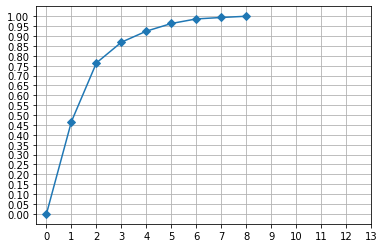

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cum_exp_var_ratio = np.hstack([0, pcamodel.explained_variance_ratio_]).cumsum()
plt.plot(cum_exp_var_ratio, 'D-')
plt.xticks(range(14))
plt.yticks(np.arange(0,1.05,0.05))
plt.grid()
plt.show()

In [ ]:
pca = PCA(n_components=0.95)              # 特徴量の成分を95％まで削減する
X_train_pca = pca.fit_transform(X_train)  # 訓練データに適応させる
X_test_pca = pca.transform(X_test)        # テストデータに適応させる
print("もとの訓練データ",X_train.shape[1])          # もとの特徴量の数
print("次元削減後の訓練データ",X_train_pca.shape[1]) # 次元削減後の特徴量の数

もとの訓練データ 8
次元削減後の訓練データ 5


In [ ]:
#次元削減後ロジスティック回帰のパターン
model = LogisticRegression()
model.fit(X_train_pca,train_y)
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(test_y, y_pred)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7706359945872802

In [ ]:
#次元削減後のランダムフォレストランダムフォレスト
model4 = RandomForestClassifier()
model4.fit(X_train_pca,train_y)
y_pred4 = model4.predict(X_test_pca)
accuracy4 = accuracy_score(test_y, y_pred4)
print(accuracy4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7401894451962111
